In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn import linear_model
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
import copy

In [111]:
data = pd.read_csv('customer_data.csv')

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        400 non-null    int64
 1   salary     400 non-null    int64
 2   purchased  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [113]:
data.head()

,age,salary,purchased
0,44,39000,0
1,32,120000,1
2,38,50000,0
3,32,135000,1
4,52,21000,1


In [114]:
# shuffling data
data = data.sample(frac=1)

In [115]:
data.head()

,age,salary,purchased
230,30,116000,0
146,39,71000,0
78,52,138000,1
273,20,23000,0
124,48,141000,0


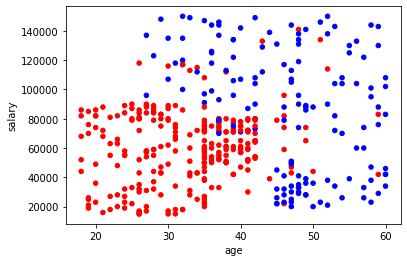

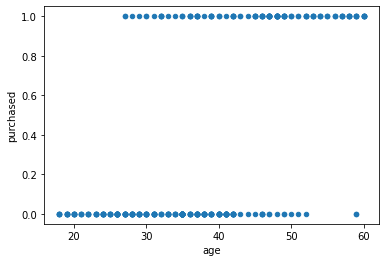

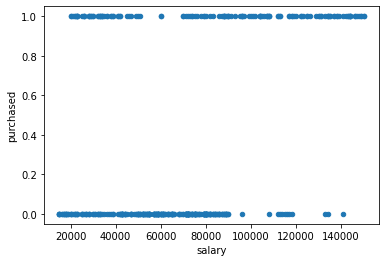

In [116]:
getColor = lambda x: 'red' if x == 0 else 'blue'
color = list(map(getColor, data['purchased']))

data.plot(kind='scatter', x='age', y='salary', c=color)
plot.show()

data.plot(kind='scatter', x='age', y='purchased')
plot.show()

data.plot(kind='scatter', x='salary', y='purchased')
plot.show()

In [117]:
# splitting data
x = data.drop(columns = ['purchased']).to_numpy().reshape((-1,2))
y = data['purchased'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y)

'''
x_train = x[0:320]
y_train = y[0:320]
x_test = x[320:]
y_test = y[320:]'''

'\nx_train = x[0:320]\ny_train = y[0:320]\nx_test = x[320:]\ny_test = y[320:]'

In [118]:
x_train.shape

(300, 2)

In [119]:
x_test.shape

(100, 2)

In [120]:
def zscore_norm(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    x_norm = (X - mu) / sigma      

    return (x_norm, mu, sigma)

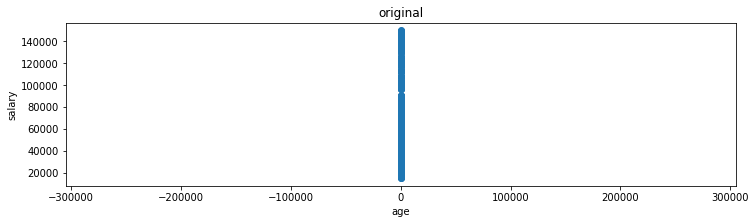

In [121]:
fig,ax=plot.subplots(1, 1, figsize=(12, 3))
ax.scatter(x_train[:,0], x_train[:,1])
ax.set_xlabel("age"); ax.set_ylabel("salary");
ax.set_title(r"original")
plot.axis('equal')
plot.show()

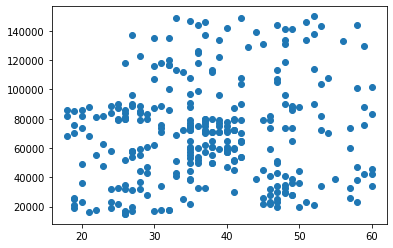

In [122]:
plot.scatter(x=x_train[:,0], y=x_train[:,1])
plot.show()

In [123]:
#normalize data using z-score
x_norm, X_mu, X_sigma = zscore_norm(x_train)
x_train = x_norm

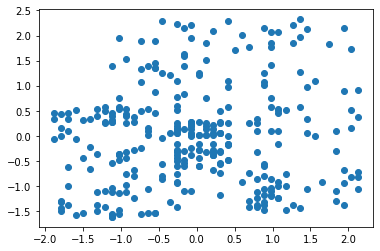

In [124]:
plot.scatter(x=x_norm[:,0], y=x_norm[:,1])
plot.show()

In [125]:
# UNQ_C1
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    return 1/(1+np.exp(-z))

In [126]:
sigmoid(0)

0.5

In [127]:
def compute_cost(X, y, w, b, lambda_= 1):
    m, n = X.shape
    cost = 0.0
    
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i] * np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
    total_cost = cost/m
    return total_cost

In [128]:
m, n = x_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(x_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): 0.693


In [129]:
w = np.array([0.2, 0.2])
b = 0.5


cost = compute_cost(x_train , y_train, w, b)

print('Cost at test w,b: {:.3f}'.format(cost))

Cost at test w,b: 0.705


In [130]:
def compute_gradient(X, y, w, b, lambda_=None): 
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   
        
    return dj_db, dj_dw

In [131]:
def gradient_descent(X, y, w_in, b_in, alpha, iters): 
    jList = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        jList.append( compute_cost(X, y, w, b) )

        # Print cost in interval of 1000 iteration
        if i% math.ceil(iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {jList[-1]}   ")
        
    return w, b, jList         #return final w,b and J history for graphing

In [140]:
def predict(X, w, b): 
      
    m, n = X.shape   
    yPred = np.zeros(m)
   
    for i in range(m):   
        z_wb = np.dot(X[i],w) 
        z_wb += b
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        yPred[i] = 1 if f_wb>=0.5 else 0
    
    return yPred

In [133]:
def accuracy(yPred, yTrue):
  return 1- np.sum(np.abs(yPred-yTrue))/len(yPred)

In [134]:
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000
lambda_ = 1

w_out, b_out, J_history = gradient_descent(x_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.6804385969760474   
Iteration 1000: Cost 0.3652583976210828   
Iteration 2000: Cost 0.36519131017682727   
Iteration 3000: Cost 0.36519105386981976   
Iteration 4000: Cost 0.36519105282381614   
Iteration 5000: Cost 0.3651910528195295   
Iteration 6000: Cost 0.3651910528195123   
Iteration 7000: Cost 0.36519105281951203   
Iteration 8000: Cost 0.3651910528195123   
Iteration 9000: Cost 0.36519105281951214   

updated parameters: w:[2.40878704 1.2178633 ], b:-0.9881381651891498


In [142]:
# accuracy of test set
normalizedInput = (x_test - X_mu)/X_sigma

yPred = predict(normalizedInput, w_out, b_out)
acc = accuracy(yPred, y_test)
print(f"accuracy of test set = {acc}")

# accuracy of training set
yPred = predict(x_train, w_out, b_out)
acc = accuracy(yPred, y_train)
print(f"accuracy of training set = {acc}")

accuracy of test set = 0.9
accuracy of training set = 0.8366666666666667


In [143]:
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
alph = 0.01
iters = 10000
lambda_ = 1

w_out, b_out, J_history = gradient_descent(x_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.6918606480849567   
Iteration 1000: Cost 0.40343818941389537   
Iteration 2000: Cost 0.3781298514151974   
Iteration 3000: Cost 0.3707790599138384   
Iteration 4000: Cost 0.36787929194640284   
Iteration 5000: Cost 0.3665637803144701   
Iteration 6000: Cost 0.36591836157098756   
Iteration 7000: Cost 0.3655858959348085   
Iteration 8000: Cost 0.3654090254576803   
Iteration 9000: Cost 0.365312817733553   

updated parameters: w:[2.34947665 1.18665077], b:-0.967746221810799


In [144]:
# accuracy of test set
normalizedInput = (x_test - X_mu)/X_sigma
yPred = predict(normalizedInput, w_out, b_out)
acc = accuracy(yPred, y_test)
print(f"accuracy of test set = {acc}")


# accuracy of training set
yPred = predict(x_train, w_out, b_out)
acc = accuracy(yPred, y_train)
print(f"accuracy of training set = {acc}")


accuracy of test set = 0.9
accuracy of training set = 0.8366666666666667


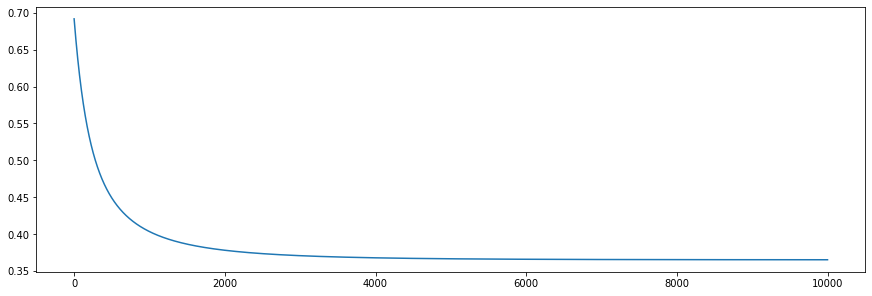

In [145]:
fig, ax1 = plot.subplots(1, 1, constrained_layout=True, figsize=(12,4))
ax1.plot(J_history)
plot.show()

In [146]:
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
alph = 0.001
iters = 10000


w_out, b_out, J_history = gradient_descent(x_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.6930183705454538   
Iteration 1000: Cost 0.5932557603183981   
Iteration 2000: Cost 0.5330427007781948   
Iteration 3000: Cost 0.49440333357026334   
Iteration 4000: Cost 0.4680786469248265   
Iteration 5000: Cost 0.44923403774359105   
Iteration 6000: Cost 0.43520270055247806   
Iteration 7000: Cost 0.4244234676777789   
Iteration 8000: Cost 0.41593194590151894   
Iteration 9000: Cost 0.40910423052027106   

updated parameters: w:[1.27506423 0.63817856], b:-0.546041829016243


In [147]:
# accuracy of test set
normalizedInput = (x_test - X_mu)/X_sigma
yPred = predict(normalizedInput, w_out, b_out)
acc = accuracy(yPred, y_test)
print(f"accuracy of test set = {acc}")


# accuracy of training set
yPred = predict(x_train, w_out, b_out)
acc = accuracy(yPred, y_train)
print(f"accuracy of training set = {acc}")


accuracy of test set = 0.9
accuracy of training set = 0.8366666666666667


In [148]:
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
alph = 0.0001
iters = 10000


w_out, b_out, J_history = gradient_descent(x_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.6931342979908237   
Iteration 1000: Cost 0.6805941722146802   
Iteration 2000: Cost 0.6687134844185453   
Iteration 3000: Cost 0.6574559150310973   
Iteration 4000: Cost 0.6467863654028577   
Iteration 5000: Cost 0.6366710985410733   
Iteration 6000: Cost 0.6270778383525799   
Iteration 7000: Cost 0.6179758326402243   
Iteration 8000: Cost 0.6093358851686137   
Iteration 9000: Cost 0.6011303619389221   

updated parameters: w:[0.26115211 0.13815205], b:-0.1092769439487288


In [149]:
# accuracy of test set
normalizedInput = (x_test - X_mu)/X_sigma
yPred = predict(normalizedInput, w_out, b_out)
acc = accuracy(yPred, y_test)
print(f"accuracy of test set = {acc}")


# accuracy of training set
yPred = predict(x_train, w_out, b_out)
acc = accuracy(yPred, y_train)
print(f"accuracy of training set = {acc}")


accuracy of test set = 0.89
accuracy of training set = 0.8333333333333334


In [155]:
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
alph = 30
iters = 10000


w_out, b_out, J_history = gradient_descent(x_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.6503472615324405   
Iteration 1000: Cost 0.7558552618399975   
Iteration 2000: Cost 0.7558552618399975   
Iteration 3000: Cost 0.7558552618399975   
Iteration 4000: Cost 0.7558552618399975   
Iteration 5000: Cost 0.7558552618399975   
Iteration 6000: Cost 0.7558552618399975   
Iteration 7000: Cost 0.7558552618399975   
Iteration 8000: Cost 0.7558552618399975   
Iteration 9000: Cost 0.7558552618399975   

updated parameters: w:[6.40322205 1.55770217], b:0.8164735390867204


In [156]:
# accuracy of test set
normalizedInput = (x_test - X_mu)/X_sigma
yPred = predict(normalizedInput, w_out, b_out)
acc = accuracy(yPred, y_test)
print(f"accuracy of test set = {acc}")


# accuracy of training set
yPred = predict(x_train, w_out, b_out)
acc = accuracy(yPred, y_train)
print(f"accuracy of training set = {acc}")

accuracy of test set = 0.78
accuracy of training set = 0.7533333333333333
